# Project - 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Project Task: Week 1

Data Cleaning:

    1. Perform a preliminary data inspection and data cleaning.

        a. Check for missing data and formulate an apt strategy to treat them.

        b. Remove duplicate data records.

        c. Perform descriptive analytics on the given data.

Data Transformation:

    2. Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

        a. Create month cohorts and analyze active customers for each cohort.

        b. Analyze the retention rate of customers.

In [2]:
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.shape

(541909, 8)

In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df = df.drop('Description', axis=1)
df = df.dropna()
df.shape

(406829, 7)

In [7]:
df = df.drop_duplicates()
df.shape

(401602, 7)

In [8]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [9]:
df.describe()

,Quantity,UnitPrice
count,401602.000000,401602.000000
mean,12.182579,3.474064
std,250.283248,69.764209
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [10]:
df['month_year'] = df['InvoiceDate'].dt.to_period('M')
df['month_year'].nunique()

13

In [11]:
month_cohort = df.groupby('month_year')['CustomerID'].nunique()
month_cohort

month_year
2010-12     948
2011-01     783
2011-02     798
2011-03    1020
2011-04     899
2011-05    1079
2011-06    1051
2011-07     993
2011-08     980
2011-09    1302
2011-10    1425
2011-11    1711
2011-12     686
Freq: M, Name: CustomerID, dtype: int64

Text(0.5, 1.0, 'No. of active customers in each month')

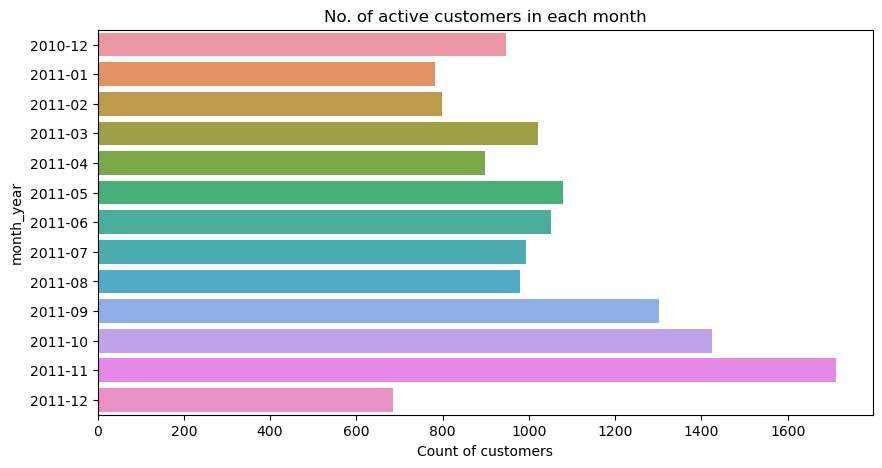

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(y = month_cohort.index, x = month_cohort.values);
plt.xlabel("Count of customers")
plt.title("No. of active customers in each month")

In [13]:
month_cohort - month_cohort.shift(1)

month_year
2010-12       NaN
2011-01    -165.0
2011-02      15.0
2011-03     222.0
2011-04    -121.0
2011-05     180.0
2011-06     -28.0
2011-07     -58.0
2011-08     -13.0
2011-09     322.0
2011-10     123.0
2011-11     286.0
2011-12   -1025.0
Freq: M, Name: CustomerID, dtype: float64

In [14]:
retention_rate = round(month_cohort.pct_change(periods=1)*100,2)
retention_rate

month_year
2010-12      NaN
2011-01   -17.41
2011-02     1.92
2011-03    27.82
2011-04   -11.86
2011-05    20.02
2011-06    -2.59
2011-07    -5.52
2011-08    -1.31
2011-09    32.86
2011-10     9.45
2011-11    20.07
2011-12   -59.91
Freq: M, Name: CustomerID, dtype: float64

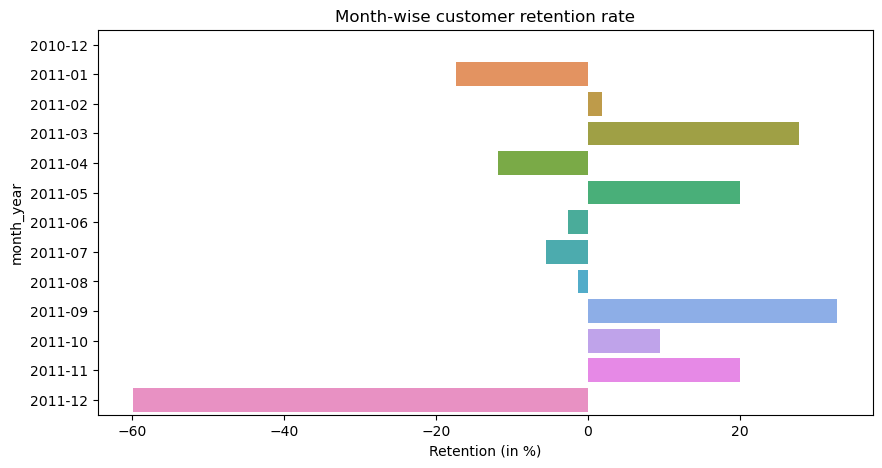

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(y = retention_rate.index, x = retention_rate.values);
plt.xlabel("Retention (in %)")
plt.title("Month-wise customer retention rate");

# Project Task: Week 2

Data Modeling :

    1. Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

    2. Calculate RFM metrics.

    3. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

        b1. Combine three ratings to get a RFM segment (as strings).

        b2. Get the RFM score by adding up the three ratings.

        b3. Analyze the RFM segments by summarizing them and comment on the findings.

        Note: Rate “recency" for customer who has been active more recently higher than the less recent customer, because each company wants its customers to be recent.

        Note: Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money

In [16]:
df['Sales'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month_year,Sales
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34


In [17]:
df_monetary = df.groupby('CustomerID').sum()['Sales'].reset_index()
df_monetary

,CustomerID,Sales
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2045.53


In [18]:
df_frequency = df.groupby('CustomerID').nunique()['InvoiceNo'].reset_index()
df_frequency

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18280.0,1
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16


In [19]:
from datetime import timedelta

In [20]:
ref_day = max(df['InvoiceDate']) + timedelta(days=1)
df['days_to_last_order'] = (ref_day - df['InvoiceDate']).dt.days
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month_year,Sales,days_to_last_order
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30,374
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,374
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00,374
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,374
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,374


In [21]:
df_recency = df.groupby('CustomerID')['days_to_last_order'].min().reset_index()
df_recency

,CustomerID,days_to_last_order
0,12346.0,326
1,12347.0,2
2,12348.0,75
3,12349.0,19
4,12350.0,310
...,...,...
4367,18280.0,278
4368,18281.0,181
4369,18282.0,8
4370,18283.0,4


In [22]:
df_rf = pd.merge(df_recency, df_frequency,  on='CustomerID', how='inner')
df_rfm = pd.merge(df_rf, df_monetary, on='CustomerID', how='inner')
df_rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
df_rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4367,18280.0,278,1,180.60
4368,18281.0,181,1,80.82
4369,18282.0,8,3,176.60
4370,18283.0,4,16,2045.53


newest    2734
newer      588
medium     416
older      353
oldest     281
Name: recency_labels, dtype: int64

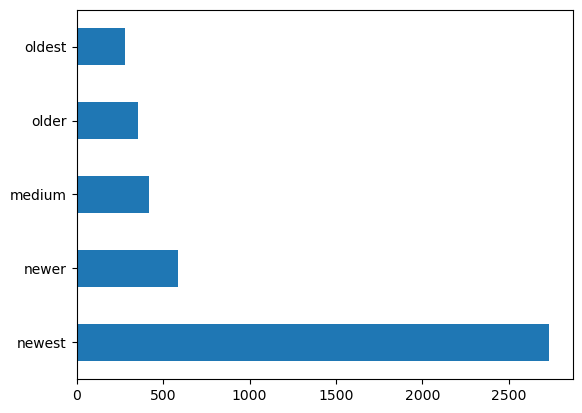

In [23]:
df_rfm['recency_labels'] = pd.cut(df_rfm['Recency'], bins=5,
                                     labels=['newest', 'newer', 'medium', 'older', 'oldest'])
df_rfm['recency_labels'].value_counts().plot(kind='barh');
df_rfm['recency_labels'].value_counts()

lowest     4348
lower        18
medium        3
highest       2
higher        1
Name: frequency_labels, dtype: int64

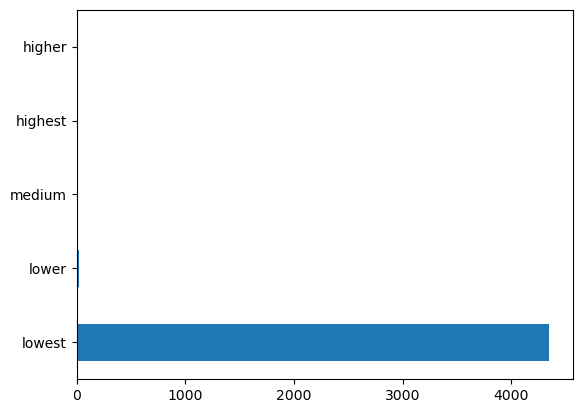

In [24]:
df_rfm['frequency_labels'] = pd.cut(df_rfm['Frequency'], bins=5, labels=['lowest', 'lower', 'medium', 'higher', 'highest'])
df_rfm['frequency_labels'].value_counts().plot(kind='barh');
df_rfm['frequency_labels'].value_counts()

smallest    4357
smaller        9
medium         3
largest        2
larger         1
Name: monetary_labels, dtype: int64

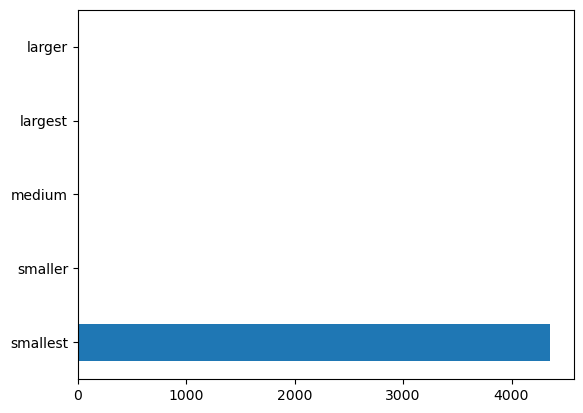

In [25]:
df_rfm['monetary_labels'] = pd.cut(df_rfm['Monetary'], bins=5, labels=['smallest', 'smaller', 'medium', 'larger', 'largest'])
df_rfm['monetary_labels'].value_counts().plot(kind='barh');
df_rfm['monetary_labels'].value_counts()

In [26]:
df_rfm['rfm_segment'] = df_rfm[['recency_labels','frequency_labels','monetary_labels']].agg('-'.join, axis=1)
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest-lowest-smallest
1,12347.0,2,7,4310.00,newest,lowest,smallest,newest-lowest-smallest
2,12348.0,75,4,1797.24,newest,lowest,smallest,newest-lowest-smallest
3,12349.0,19,1,1757.55,newest,lowest,smallest,newest-lowest-smallest
4,12350.0,310,1,334.40,oldest,lowest,smallest,oldest-lowest-smallest


In [27]:
recency_dict = {'newest': 5, 'newer':4, 'medium': 3, 'older':2, 'oldest':1}
frequency_dict = {'lowest':1, 'lower':2, 'medium': 3, 'higher':4, 'highest':5}
monetary_dict = {'smallest':1, 'smaller':2, 'medium': 3, 'larger':4, 'largest':5}

df_rfm['rfm_score'] = df_rfm['recency_labels'].map(recency_dict).astype(int)+ df_rfm['frequency_labels'].map(frequency_dict).astype(int) + df_rfm['monetary_labels'].map(monetary_dict).astype(int)
df_rfm.head(5)

,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment,rfm_score
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest-lowest-smallest,3
1,12347.0,2,7,4310.00,newest,lowest,smallest,newest-lowest-smallest,7
2,12348.0,75,4,1797.24,newest,lowest,smallest,newest-lowest-smallest,7
3,12349.0,19,1,1757.55,newest,lowest,smallest,newest-lowest-smallest,7
4,12350.0,310,1,334.40,oldest,lowest,smallest,oldest-lowest-smallest,3


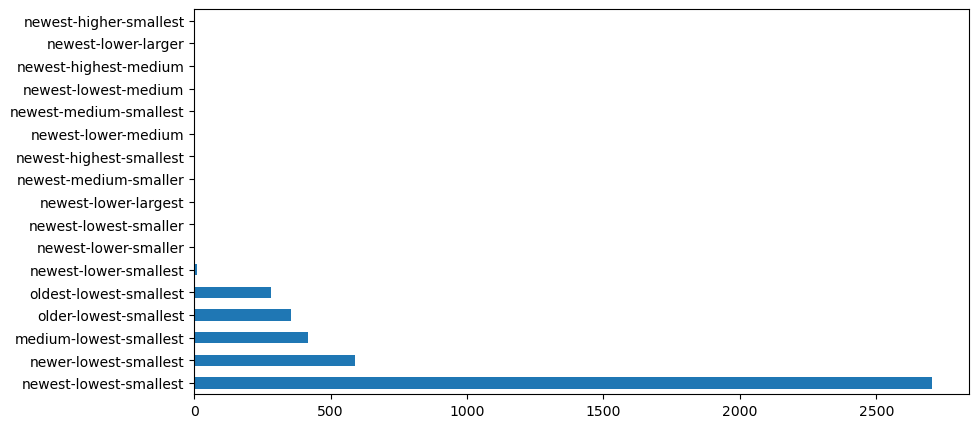

In [28]:
df_rfm['rfm_segment'].value_counts().plot(kind='barh', figsize=(10, 5));

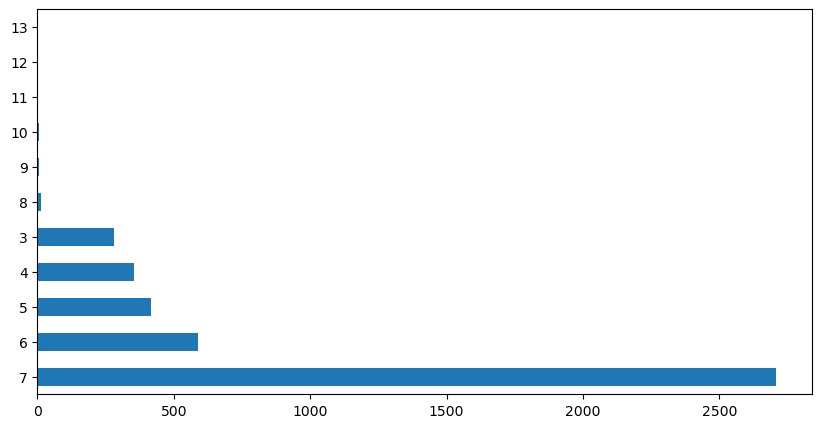

In [29]:
df_rfm['rfm_score'].value_counts().plot(kind='barh', figsize=(10, 5));

# Project Task: Week 3

Data Modeling :

    1. Create clusters using k-means clustering algorithm.

        a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

        b. Decide the optimum number of clusters to be formed.

        c. Analyze these clusters and comment on the results.

In [30]:
print(df_rfm.shape)
df_rfm.head()

(4372, 9)


,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment,rfm_score
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest-lowest-smallest,3
1,12347.0,2,7,4310.00,newest,lowest,smallest,newest-lowest-smallest,7
2,12348.0,75,4,1797.24,newest,lowest,smallest,newest-lowest-smallest,7
3,12349.0,19,1,1757.55,newest,lowest,smallest,newest-lowest-smallest,7
4,12350.0,310,1,334.40,oldest,lowest,smallest,oldest-lowest-smallest,3


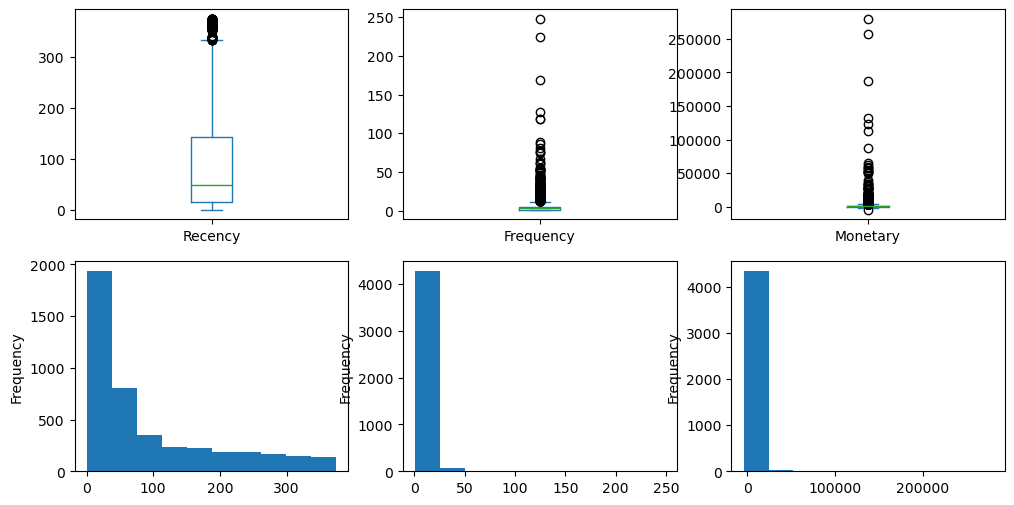

In [31]:
plt.figure(figsize=(12,6))

for i, feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(2,3,i+1)
    df_rfm[feature].plot(kind='box')
    plt.subplot(2,3,i+1+3)
    df_rfm[feature].plot(kind='hist')

In [32]:
df_rfm = df_rfm[(df_rfm['Frequency']<60) & (df_rfm['Monetary']<40000)]
df_rfm.shape

(4346, 9)

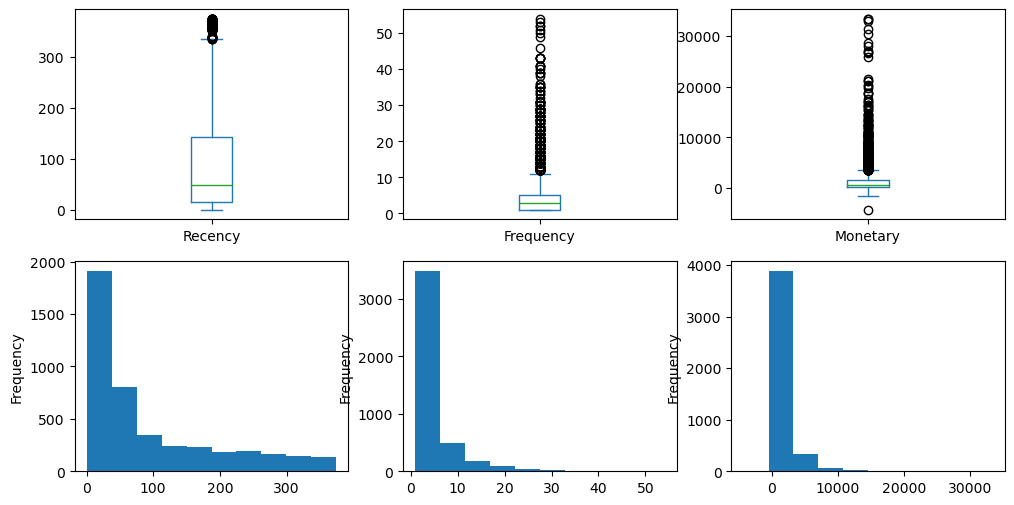

In [33]:
plt.figure(figsize=(12,6))

for i, feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(2,3,i+1)
    df_rfm[feature].plot(kind='box')
    plt.subplot(2,3,i+1+3)
    df_rfm[feature].plot(kind='hist')

In [34]:
df_rfm_log_trans = pd.DataFrame()
df_rfm_log_trans['Recency'] = np.log(df_rfm['Recency'])
df_rfm_log_trans['Frequency'] = np.log(df_rfm['Frequency'])
df_rfm_log_trans['Monetary'] = np.log(df_rfm['Monetary']-df_rfm['Monetary'].min()+1)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

df_rfm_scaled = scaler.fit_transform(df_rfm_log_trans[['Recency', 'Frequency', 'Monetary']])
df_rfm_scaled

df_rfm_scaled = pd.DataFrame(df_rfm_scaled)
df_rfm_scaled.columns = ['Recency', 'Frequency', 'Monetary']
df_rfm_scaled.head()

,Recency,Frequency,Monetary
0,1.402988,-0.388507,-0.770922
1,-2.100874,0.967301,1.485132
2,0.392218,0.361655,0.364190
3,-0.552268,-1.138669,0.342970
4,1.368370,-1.138669,-0.527416


In [37]:
from sklearn.cluster import KMeans

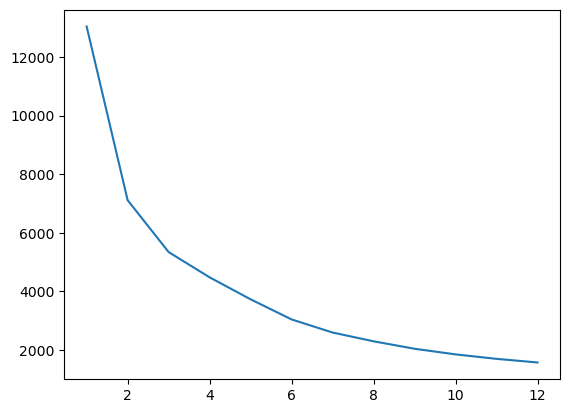

In [38]:
css = []
range_n_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(df_rfm_scaled)
    
    css.append(kmeans.inertia_)
    
plt.plot(range_n_clusters,css);

From Elbow Method, we can take the number of clusters : 3 i.e., K=3

In [39]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_rfm_scaled)

KMeans(max_iter=50, n_clusters=3)

In [40]:
kmeans.labels_

array([1, 0, 2, ..., 2, 0, 2])

In [41]:
df_inertia = pd.DataFrame(list(zip(range_n_clusters, css)), columns=['clusters', 'intertia'])
df_inertia

,clusters,intertia
0,1,13038.000000
1,2,7113.097396
2,3,5343.136928
3,4,4481.004515
4,5,3730.922591
5,6,3044.898802
6,7,2598.303803
7,8,2299.162353
8,9,2044.740060
9,10,1852.943294


In [42]:
df_rfm['Cluster_Id'] = kmeans.labels_
df_rfm.head()

C:\Users\Vinosh\AppData\Local\Temp\ipykernel_11852\497853074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['Cluster_Id'] = kmeans.labels_


,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment,rfm_score,Cluster_Id
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest-lowest-smallest,3,1
1,12347.0,2,7,4310.00,newest,lowest,smallest,newest-lowest-smallest,7,0
2,12348.0,75,4,1797.24,newest,lowest,smallest,newest-lowest-smallest,7,2
3,12349.0,19,1,1757.55,newest,lowest,smallest,newest-lowest-smallest,7,1
4,12350.0,310,1,334.40,oldest,lowest,smallest,oldest-lowest-smallest,3,1


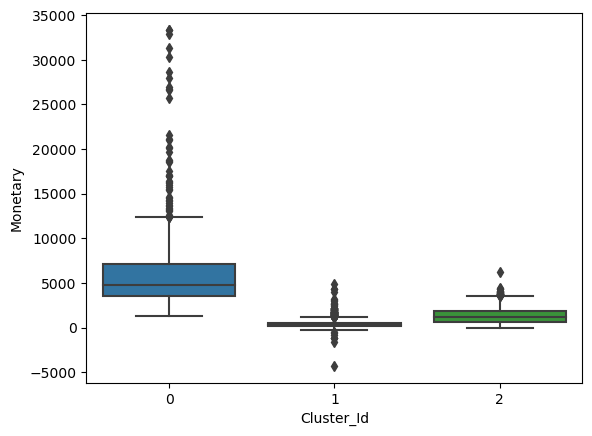

In [43]:
sns.boxplot(x='Cluster_Id', y='Monetary', data=df_rfm)
plt.show()

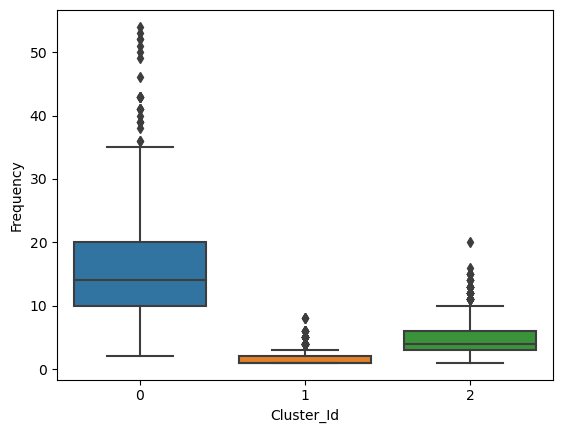

In [44]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=df_rfm)
plt.show()

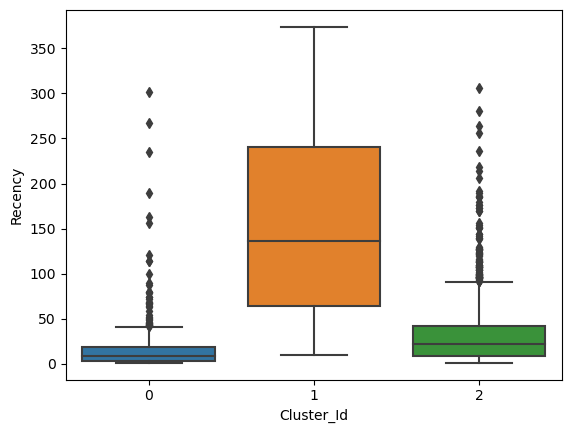

In [45]:
sns.boxplot(x='Cluster_Id', y='Recency', data=df_rfm)
plt.show()

Refrence from the Plots
    
    1. Customers with Cluster Id 0 are less frequent buyers with low monetary expenditure and also they have not purchased  anything in recent time and hence least important for business.
    
    2. Customers with Cluster Id 1 are the customers having Recency, Frequency and Monetary score in the medium range.
    
    3. Customers with Cluster Id 2 are the most frequent buyers, spending high amount and recently placing orders so they   are the most important customers from business point of view.

# Project Task: Week 4

Data Reporting:

    1. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

        a. Country-wise analysis to demonstrate average spend. Use a bar chart to show the monthly figures

        b. Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold

        c. Bar graph to show the count of orders vs. hours throughout the day

        d. Plot the distribution of RFM values using histogram and frequency charts

        e. Plot error (cost) vs. number of clusters selected

        f. Visualize to compare the RFM values of the clusters using heatmap

In [46]:
df.to_excel('master_data.xlsx', index=False)

In [47]:
df_rfm.to_excel('rfm_data.xlsx', index=False)

In [48]:
df_inertia.to_excel('inertia.xlsx', index=False)

In [49]:
product_desc = pd.read_excel("Online Retail.xlsx")
product_desc = product_desc[['StockCode', 'Description']]
product_desc = product_desc.drop_duplicates()
product_desc.to_csv('product_desc.csv', index=False)

# Check the tableau link for the Dashboard